# Analyze the results from annotations
Show agreements and disagreements between the annotated polarities and the document- sentence- and target- level annotations

Note: This repositiry contains code that is being updated as the project is proceeding, and adjustments may have occured since the publishing of the ELSA paper

In [31]:
import json
import os
import time
from collections import Counter, defaultdict
import numpy as np
import random
import pandas as pd
import torch

save_root = "outputs/"
tabular_savefolder = os.path.join(save_root, "tabular")


Document polarity vs entity polarity: 133 281 0.473
doc_pol     Negative  Neutral  Positive
manual_pol                             
Neg               15        8         5
Neu               29       66        75
Pos                3       26        52


<AxesSubplot:xlabel='doc_pol'>

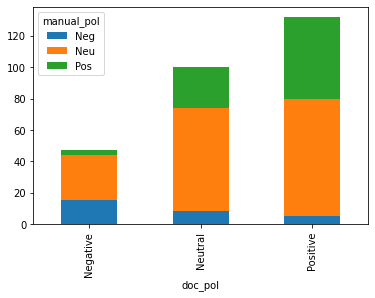

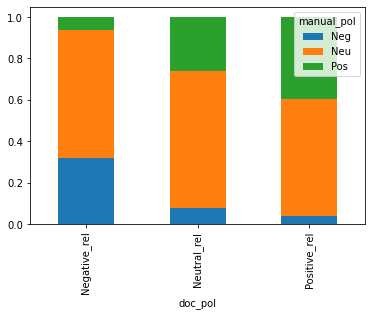

In [32]:


excel_path = os.path.join(tabular_savefolder,"elsa_entities_annotated.xlsx" )
df = pd.read_excel(excel_path)
df = df.loc[df["manual_pol"]!="Spurious"]

doc_map = {1:"Negative", 2:"Negative", 3:"Neutral", 4:"Neutral", 5:"Positive", 6:"Positive"}
df["doc_pol"] = df["doc_rating"].map(doc_map)
doc_elsa = pd.pivot_table(df, index = ["manual_pol"], values = "entity_id", columns = "doc_pol", aggfunc='count')
# Document-level polarity vs entity polarity
hits = np.sum([doc_elsa.at[pol[:3], pol] for pol in ["Negative", "Neutral","Positive"]])
print("Document polarity vs entity polarity:",hits, len(df), round(hits/len(df), 3))

print(doc_elsa)
doc_elsa.T.plot.bar(stacked=True)
for c in doc_elsa.columns:
    doc_elsa[c+"_rel"] = doc_elsa[c]/doc_elsa[c].sum()
doc_elsa[[c for c in doc_elsa.columns if "_rel" in c]].T.plot.bar(stacked=True)


Sentence polarity vs entity polarity: 194.0 281 0.69
sent_pol_resolved  Mixed  Negative  Neutral  Positive
manual_pol                                           
Neg                  9.0      10.0      8.0       1.0
Neu                  4.0      17.0    115.0      34.0
Pos                  9.0       NaN      3.0      69.0


<AxesSubplot:xlabel='sent_pol_resolved'>

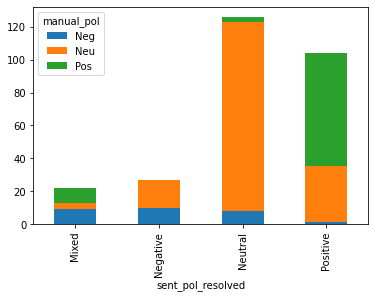

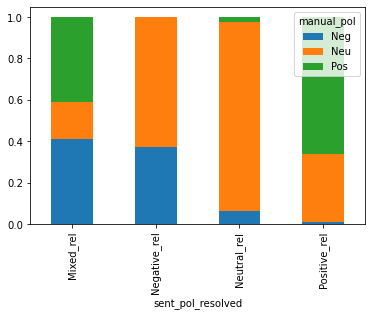

In [33]:
# Sentence polarity
sent_elsa = pd.pivot_table(df, index = ["manual_pol"], values = "entity_id", columns = "sent_pol_resolved", aggfunc='count')
# Sentence-level polarity vs entity polarity
hits = np.sum([sent_elsa.at[pol[:3], pol] for pol in ["Negative", "Neutral","Positive"]])
print("Sentence polarity vs entity polarity:",hits, len(df), round(hits/len(df), 3))

print(sent_elsa)
sent_elsa.T.plot.bar(stacked=True)
for c in sent_elsa.columns:
    sent_elsa[c+"_rel"] = sent_elsa[c]/sent_elsa[c].sum()
sent_elsa[[c for c in sent_elsa.columns if "_rel" in c]].T.plot.bar(stacked=True)

Sentiment target polarity vs entity polarity: 231.0 281 0.822
targ_pol_resolved  Mixed  Negative  Neutral  Positive
manual_pol                                           
Neg                  1.0      13.0     10.0       4.0
Neu                  0.0       0.0    164.0       6.0
Pos                  4.0       3.0     20.0      54.0


<AxesSubplot:xlabel='targ_pol_resolved'>

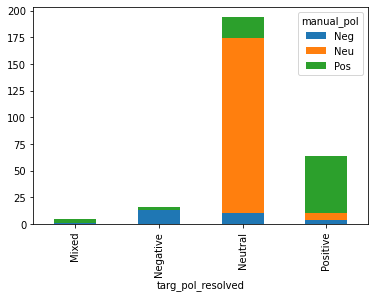

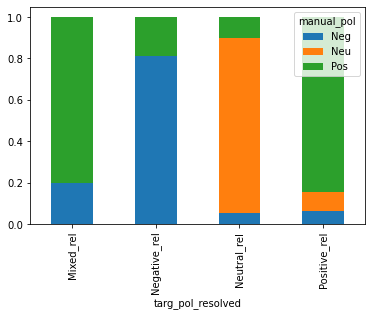

In [34]:
# ELSA vs annotated sentiment targets
df["targ_pol_resolved"]= df["targ_pol_resolved"].fillna("Neutral")
targets_elsa = pd.pivot_table(df, index = ["manual_pol"], values = "entity_id", columns = "targ_pol_resolved", aggfunc='count').fillna(0)
# Sentence-level polarity vs entity polarity
hits = np.sum([targets_elsa.at[pol[:3], pol] for pol in ["Negative", "Neutral","Positive"]])
print("Sentiment target polarity vs entity polarity:",hits, len(df), round(hits/len(df), 3))

print(targets_elsa)
targets_elsa.T.plot.bar(stacked=True)
for c in targets_elsa.columns:
    targets_elsa[c+"_rel"] = targets_elsa[c]/targets_elsa[c].sum()
targets_elsa[[c for c in targets_elsa.columns if "_rel" in c]].T.plot.bar(stacked=True)